# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json as json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
country = []
lat = []
lon = []
temp = []
temp_max = []
humid = []
cover = []
wind = []
found = []


for i in range(len(cities)):
        print(f"Processing request: {i} for city: {cities[i]}")
        query_url = f"{base_url}appid={weather_api_key}&q={cities[i]}&units={units}"
        try:
            response = requests.get(query_url).json()          
        except KeyError:
            #high level key failure
            print(f"No data returned for city: {cities[i]}")
        except:
            #some rando failure
            print(f"No data returned for city: {cities[i]}") 
        else:
            try:
                country.append(response['sys']['country'])
                lat.append(response['coord']['lat'])
                lon.append(response['coord']['lon'])
                temp.append(response['main']['temp'])
                temp_max.append(response['main']['temp_max'])
                humid.append(response['main']['humidity'])
                cover.append(response['clouds']['all'])
                wind.append(response['wind']['speed'])
                found.append({cities[i]})
                print(f"Data for {cities[i]} saved.")
            except KeyError:
                print(f"No data returned for city: {cities[i]}")


Processing request: 0 for city: albany
Data for albany saved.
Processing request: 1 for city: manggar
Data for manggar saved.
Processing request: 2 for city: kilindoni
Data for kilindoni saved.
Processing request: 3 for city: east london
Data for east london saved.
Processing request: 4 for city: busselton
Data for busselton saved.
Processing request: 5 for city: qaanaaq
Data for qaanaaq saved.
Processing request: 6 for city: punta arenas
Data for punta arenas saved.
Processing request: 7 for city: rikitea
Data for rikitea saved.
Processing request: 8 for city: karratha
Data for karratha saved.
Processing request: 9 for city: rockhampton
Data for rockhampton saved.
Processing request: 10 for city: clyde river
Data for clyde river saved.
Processing request: 11 for city: lesozavodsk
Data for lesozavodsk saved.
Processing request: 12 for city: haines junction
Data for haines junction saved.
Processing request: 13 for city: cape town
Data for cape town saved.
Processing request: 14 for cit

Data for cabedelo saved.
Processing request: 120 for city: bredasdorp
Data for bredasdorp saved.
Processing request: 121 for city: montepuez
Data for montepuez saved.
Processing request: 122 for city: ajdabiya
Data for ajdabiya saved.
Processing request: 123 for city: trairi
Data for trairi saved.
Processing request: 124 for city: sur
Data for sur saved.
Processing request: 125 for city: kayerkan
Data for kayerkan saved.
Processing request: 126 for city: abu kamal
Data for abu kamal saved.
Processing request: 127 for city: alofi
Data for alofi saved.
Processing request: 128 for city: khatanga
Data for khatanga saved.
Processing request: 129 for city: arraial do cabo
Data for arraial do cabo saved.
Processing request: 130 for city: seymchan
Data for seymchan saved.
Processing request: 131 for city: fukue
Data for fukue saved.
Processing request: 132 for city: grand river south east
No data returned for city: grand river south east
Processing request: 133 for city: savannah bight
Data fo

Data for bambanglipuro saved.
Processing request: 238 for city: itarema
Data for itarema saved.
Processing request: 239 for city: kribi
Data for kribi saved.
Processing request: 240 for city: el prat de llobregat
Data for el prat de llobregat saved.
Processing request: 241 for city: najran
Data for najran saved.
Processing request: 242 for city: tessalit
Data for tessalit saved.
Processing request: 243 for city: terrak
Data for terrak saved.
Processing request: 244 for city: tautira
Data for tautira saved.
Processing request: 245 for city: xichang
Data for xichang saved.
Processing request: 246 for city: upernavik
Data for upernavik saved.
Processing request: 247 for city: houma
Data for houma saved.
Processing request: 248 for city: vittoria
Data for vittoria saved.
Processing request: 249 for city: shaunavon
Data for shaunavon saved.
Processing request: 250 for city: atbasar
Data for atbasar saved.
Processing request: 251 for city: manaus
Data for manaus saved.
Processing request: 25

Data for barabai saved.
Processing request: 358 for city: manvi
Data for manvi saved.
Processing request: 359 for city: pascagoula
Data for pascagoula saved.
Processing request: 360 for city: ekibastuz
Data for ekibastuz saved.
Processing request: 361 for city: manaure
Data for manaure saved.
Processing request: 362 for city: dakoro
Data for dakoro saved.
Processing request: 363 for city: aliwal north
Data for aliwal north saved.
Processing request: 364 for city: madaripur
Data for madaripur saved.
Processing request: 365 for city: sao joao da barra
Data for sao joao da barra saved.
Processing request: 366 for city: kyabe
Data for kyabe saved.
Processing request: 367 for city: mackenzie
Data for mackenzie saved.
Processing request: 368 for city: luderitz
Data for luderitz saved.
Processing request: 369 for city: kyshtovka
Data for kyshtovka saved.
Processing request: 370 for city: zhuhai
Data for zhuhai saved.
Processing request: 371 for city: ruteng
Data for ruteng saved.
Processing r

Data for bata saved.
Processing request: 476 for city: gilbues
Data for gilbues saved.
Processing request: 477 for city: belmonte
Data for belmonte saved.
Processing request: 478 for city: kenai
Data for kenai saved.
Processing request: 479 for city: parrita
Data for parrita saved.
Processing request: 480 for city: oranjemund
Data for oranjemund saved.
Processing request: 481 for city: bacuit
No data returned for city: bacuit
Processing request: 482 for city: pemangkat
Data for pemangkat saved.
Processing request: 483 for city: geraldton
Data for geraldton saved.
Processing request: 484 for city: la ronge
Data for la ronge saved.
Processing request: 485 for city: farah
Data for farah saved.
Processing request: 486 for city: karkaralinsk
No data returned for city: karkaralinsk
Processing request: 487 for city: souris
Data for souris saved.
Processing request: 488 for city: zavodoukovsk
Data for zavodoukovsk saved.
Processing request: 489 for city: urumqi
Data for urumqi saved.
Processin

Data for miri saved.
Processing request: 594 for city: san quintin
Data for san quintin saved.
Processing request: 595 for city: dasoguz
Data for dasoguz saved.
Processing request: 596 for city: parauna
Data for parauna saved.
Processing request: 597 for city: plyussa
Data for plyussa saved.
Processing request: 598 for city: pinhao
Data for pinhao saved.
Processing request: 599 for city: sohag
Data for sohag saved.
Processing request: 600 for city: mackay
Data for mackay saved.
Processing request: 601 for city: zhigansk
Data for zhigansk saved.
Processing request: 602 for city: bundaberg
Data for bundaberg saved.
Processing request: 603 for city: gigmoto
Data for gigmoto saved.
Processing request: 604 for city: laguna
Data for laguna saved.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from cities, lat, lon, temp, humid, cover and wind
weather_dict = {
    "country":country,
    "city": found,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "max_temp": temp_max,
    "humid": humid,
    "cover": cover,
    "wind": wind}    

cities_df = pd.DataFrame(weather_dict)
# save the API data to file
cities_df.to_csv("../output_data/cities.csv", index=False, header=True)

In [5]:
#cities_df.at[3, 'humid'] = 101
cities_df.head()

,country,city,lat,lon,temp,max_temp,humid,cover,wind
0,US,{albany},42.6001,-73.9662,83.77,87.75,76,35,4.41
1,ID,{manggar},-2.8833,108.2667,81.90,81.90,75,41,13.42
2,TZ,{kilindoni},-7.9139,39.6668,75.83,75.83,69,0,14.85
3,ZA,{east london},-33.0153,27.9116,61.11,61.11,68,9,17.49
4,AU,{busselton},-33.6500,115.3333,47.05,47.05,78,35,5.50


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_df.count()

country     553
city        553
lat         553
lon         553
temp        553
max_temp    553
humid       553
cover       553
wind        553
dtype: int64

In [7]:
#  Get the indices of cities that have humidity over 100%.
index = cities_df.index
too_humid = cities_df["humid"] > 100
too_humid_index = index[too_humid]
too_humid_list = too_humid_index.tolist()
print(too_humid_list)

[]


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cool_cities_df = cities_df.drop(too_humid_index, inplace=False)

In [9]:
cool_cities_df.count()

country     553
city        553
lat         553
lon         553
temp        553
max_temp    553
humid       553
cover       553
wind        553
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

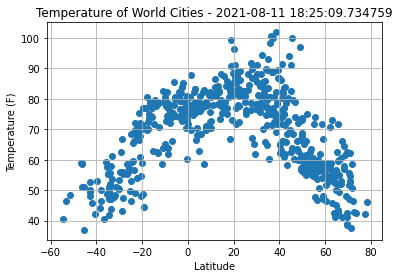

In [10]:
# Current date time in local system
current_dt = datetime.now()

plt.scatter(cool_cities_df["lat"], cool_cities_df["temp"], marker="o")

# titles, etc.
title = f"Temperature of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/TemperatureofWorldCities.png")

# Show plot
plt.show()

The chart above indicates that temperatures rise as location nears the equator, but that there are more high temperatures recorded in northern latitudes, possibly due the greater inhabitable landmass in the northern hemisphere and therefore higher number of cities for which data is available.

## Latitude vs. Humidity Plot

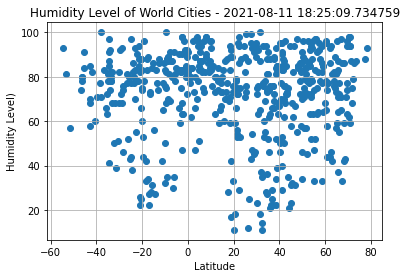

In [11]:
plt.scatter(cool_cities_df["lat"], cool_cities_df["humid"], marker="o")

# titles, etc.
title = f"Humidity Level of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Humidity Level)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/HumidityofWorldCities.png")

# Show plot
plt.show()

From the chart above I would expect that lower humidity locations tend to be approximately 20 degrees above and below the equator.

## Latitude vs. Cloudiness Plot

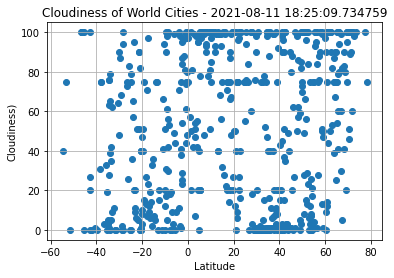

In [12]:
plt.scatter(cool_cities_df["lat"], cool_cities_df["cover"], marker="o")

# titles, etc.
title = f"Cloudiness of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Cloudiness)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/CloudinessofWorldCities.png")

# Show plot
plt.show()

The chart above seems to indicate that cloudiness is less an attribute of latitude and is probably dependent on another factor, such as coastal areas of landmasses.

## Latitude vs. Wind Speed Plot

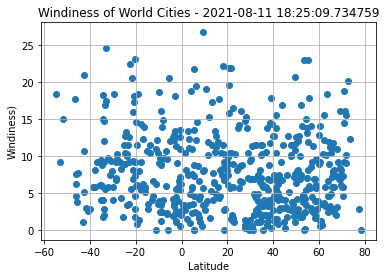

In [13]:
plt.scatter(cool_cities_df["lat"], cool_cities_df["wind"], marker="o")

# titles, etc.
title = f"Windiness of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Windiness)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/WindinessofWorldCities.png")

# Show plot
plt.show()

The chart above seems to indicate that windiness is less an attribute of latitude and is probably dependent on another factor, such as coastal areas of landmasses.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between latitude and temperature is -0.66
The r-squared is: 0.4310210462976253


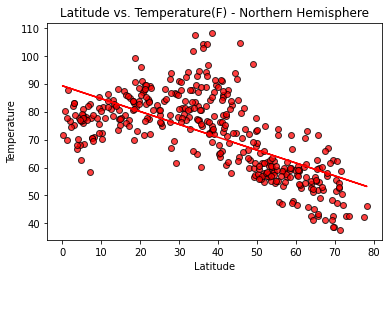

In [14]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and max temp for the Cities in the northern hemispere
# first split into northern and southern latitudes
north_lat = cities_df.loc[(cities_df["lat"] >= 0)]["lat"]
south_lat = cities_df.loc[(cities_df["lat"] < 0)]["lat"]

north_temp =  cities_df.loc[(cities_df["lat"] >= 0)]["max_temp"]

print(f"The correlation coefficient between latitude and temperature is {round(st.pearsonr(north_lat,north_temp)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Temperature(F) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(north_lat,north_temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of -0.69 it is likely that temperature is affected by latitude in the northern hemisphere, with temperatures trending downwards the further a city is from the equator.  The R2 value just below .5 tells us there are other factors that significantly effect temperatures, perhaps elevation, or the presence of Maserati dealerships.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between latitude and temperature is 0.82
The r-squared is: 0.6698737385313192


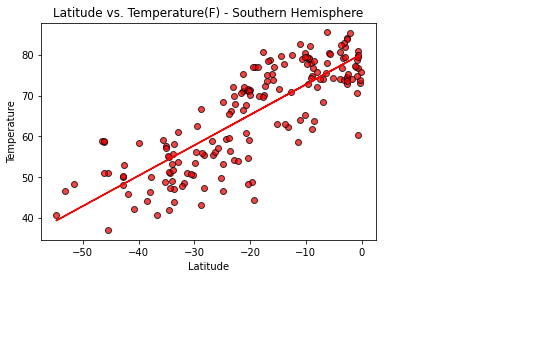

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and max temp for the Cities in the southern hemispere

south_temp =  cities_df.loc[(cities_df["lat"] < 0)]["max_temp"]

print(f"The correlation coefficient between latitude and temperature is {round(st.pearsonr(south_lat,south_temp)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Temperature(F) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(south_lat,south_temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of 0.78 it is very likely that temperature is affected by latitude in the southern hemisphere, with temperatures trending downwards the further a city is from the equator.  The R2 value of around .6 tells us distance from the equator is probably a significant factor.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between latitude and humidity is -0.03
The r-squared is: 0.0007199850309323975


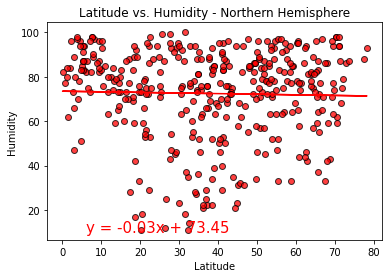

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and humidity for the Cities in the northern hemispere

north_humid =  cities_df.loc[(cities_df["lat"] >= 0)]["humid"]

print(f"The correlation coefficient between latitude and humidity is {round(st.pearsonr(north_lat,north_humid)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_humid)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Humidity - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(north_lat,north_humid, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of 0.08 and R2 less than 0.007 there doesn't seem to be a connection between humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between latitude and humidity is 0.04
The r-squared is: 0.0014287981323907128


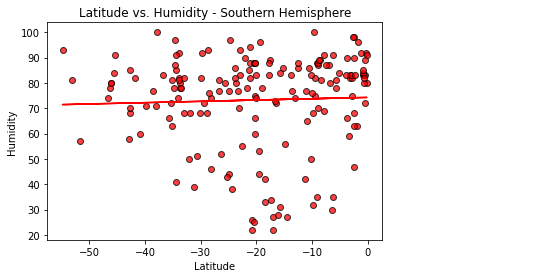

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and humidity for the Cities in the southern hemispere

south_humid =  cities_df.loc[(cities_df["lat"] < 0)]["humid"]

print(f"The correlation coefficient between latitude and humidity is {round(st.pearsonr(south_lat,south_humid)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Humidity - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(south_lat,south_humid, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of 0.07 and R2 barely above 0.005 there doesn't seem to be a connection between humidity and latitude in the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between latitude and cloudiness is -0.01
The r-squared is: 5.4418796181147514e-05


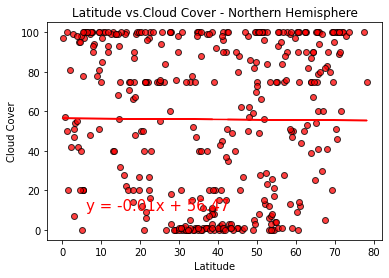

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and cloud cover for the Cities in the northern hemisphere

north_cover =  cities_df.loc[(cities_df["lat"] >= 0)]["cover"]

print(f"The correlation coefficient between latitude and cloudiness is {round(st.pearsonr(north_lat,north_cover)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_cover)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs.Cloud Cover - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")
plt.scatter(north_lat,north_cover, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of -0.05 and R2 of 0.002 there doesn't seem to be a connection between cloud cover and latitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between latitude and cloudiness is 0.12
The r-squared is: 0.013593900626814818


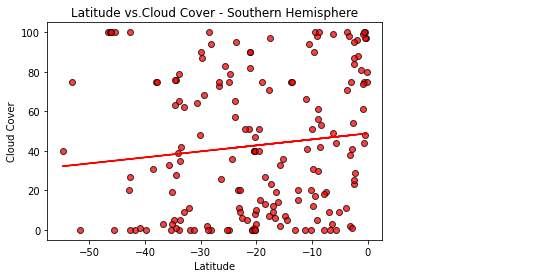

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and cloud cover for the Cities in the southern hemisphere

south_cover =  cities_df.loc[(cities_df["lat"] < 0)]["cover"]

print(f"The correlation coefficient between latitude and cloudiness is {round(st.pearsonr(south_lat,south_cover)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_cover)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs.Cloud Cover - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")
plt.scatter(south_lat,south_cover, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of 0.07 and R2 of 0.005 there doesn't seem to be a connection between cloud cover and latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between latitude and wind speed is -0.03
The r-squared is: 0.0008403579783840723


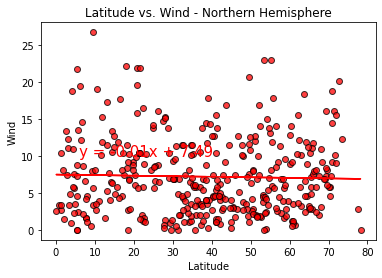

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and wind speed for the Cities

north_wind =  cities_df.loc[(cities_df["lat"] >= 0)]["wind"]

print(f"The correlation coefficient between latitude and wind speed is {round(st.pearsonr(north_lat,north_wind)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Wind - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.scatter(north_lat,north_wind, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of .01 and R2 .0000341, there is likely no relation between wind and latitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between latitude and wind speed is -0.15
The r-squared is: 0.02298572752543445


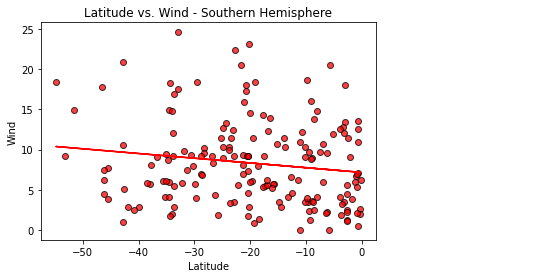

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and wind speed for the Cities in the southern hemsphere

south_wind =  cities_df.loc[(cities_df["lat"] < 0)]["wind"]

print(f"The correlation coefficient between latitude and wind speed is {round(st.pearsonr(south_lat,south_wind)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Wind - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.scatter(south_lat,south_wind, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

With a correlation coefficient of -0.19 and R2 .036, there is likely no relation between wind and latitude in the southern hemisphere.